In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
FILE = './historical/weather_processed-2021.csv'

In [4]:
df = pd.read_csv(FILE, parse_dates=["time"])
df.head()

,time,rain,precipitation,temperature_2m,dew_point_2m,soil_temperature_0_to_7cm,pressure_msl,cloud_cover,wind_speed_100m,year,month,day,hour,date
0,2021-01-01 00:00:00,0.0,0.0,19.4,14.5,19.0,1021.4,55,35.9,2021,1,1,0,2021-01-01
1,2021-01-01 01:00:00,0.0,0.0,19.6,13.9,19.1,1022.2,89,36.2,2021,1,1,1,2021-01-01
2,2021-01-01 02:00:00,0.0,0.0,19.8,13.7,19.4,1022.7,57,36.7,2021,1,1,2,2021-01-01
3,2021-01-01 03:00:00,0.0,0.0,20.4,13.6,19.9,1022.7,34,33.8,2021,1,1,3,2021-01-01
4,2021-01-01 04:00:00,0.0,0.0,20.3,14.0,20.6,1022.3,74,33.0,2021,1,1,4,2021-01-01


Text(0, 0.5, 'Lượng mưa (mm)')

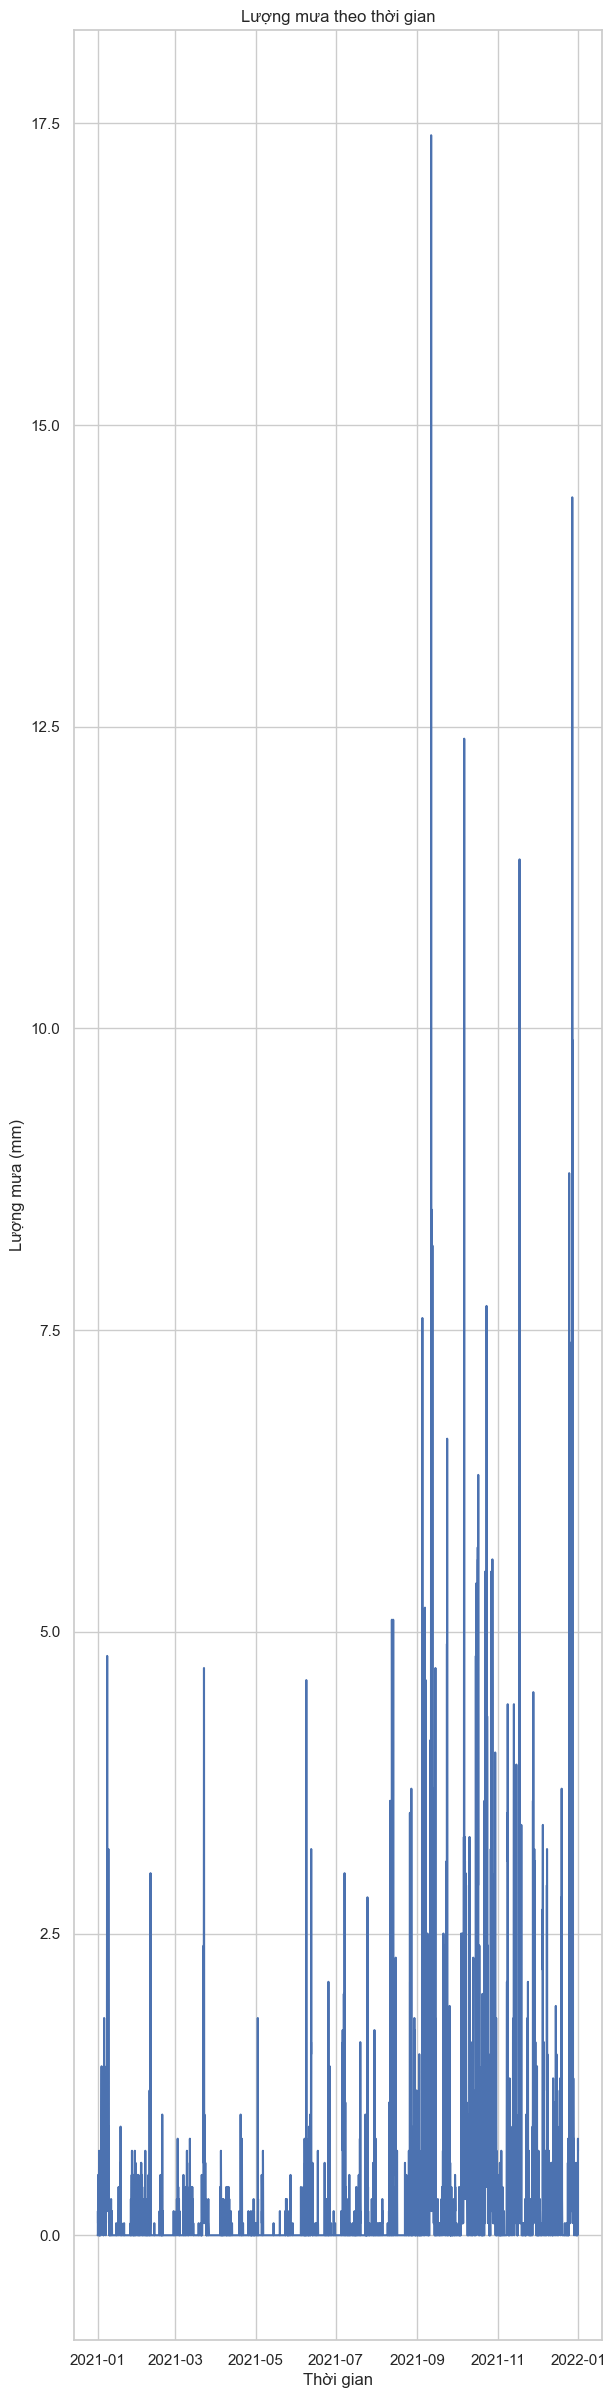

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 30))

plt.subplot(1, 2, 1)
sns.lineplot(data=df, x="time", y="rain")
plt.title("Lượng mưa theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Lượng mưa (mm)")

In [6]:
df["year_month"] = df["time"].dt.to_period("M").astype(str)
monthly_rain = df.groupby("year_month")["rain"].mean().reset_index()

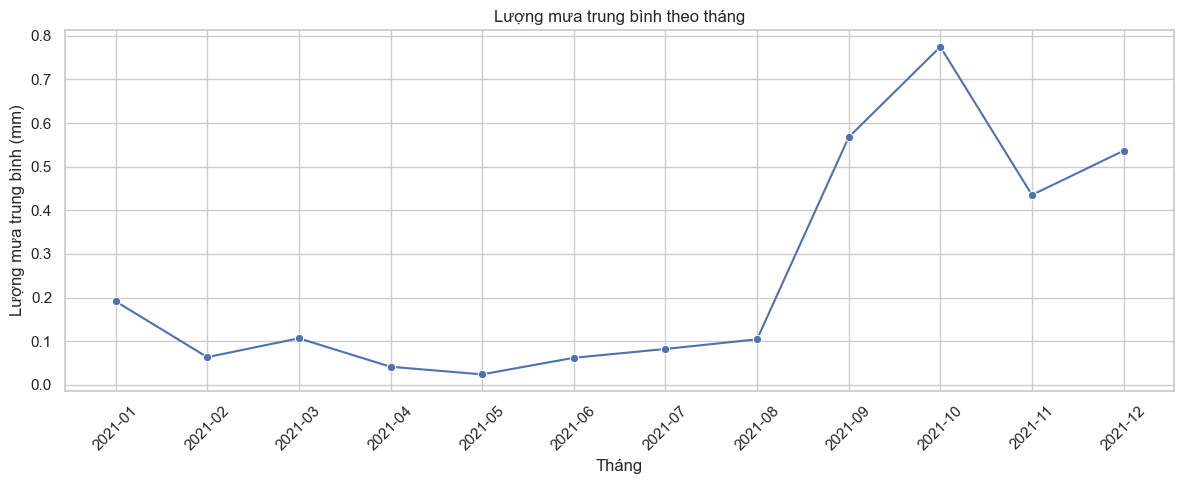

In [7]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_rain, x="year_month", y="rain", marker="o")
plt.title("Lượng mưa trung bình theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Lượng mưa trung bình (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df["year_month"] = df["time"].dt.to_period("M").astype(str)

monthly_rain = df.groupby("year_month")["rain"].sum().reset_index()


C:\Users\minhp\AppData\Local\Temp\ipykernel_24364\3016183217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_rain, x="year_month", y="rain", palette="Blues")


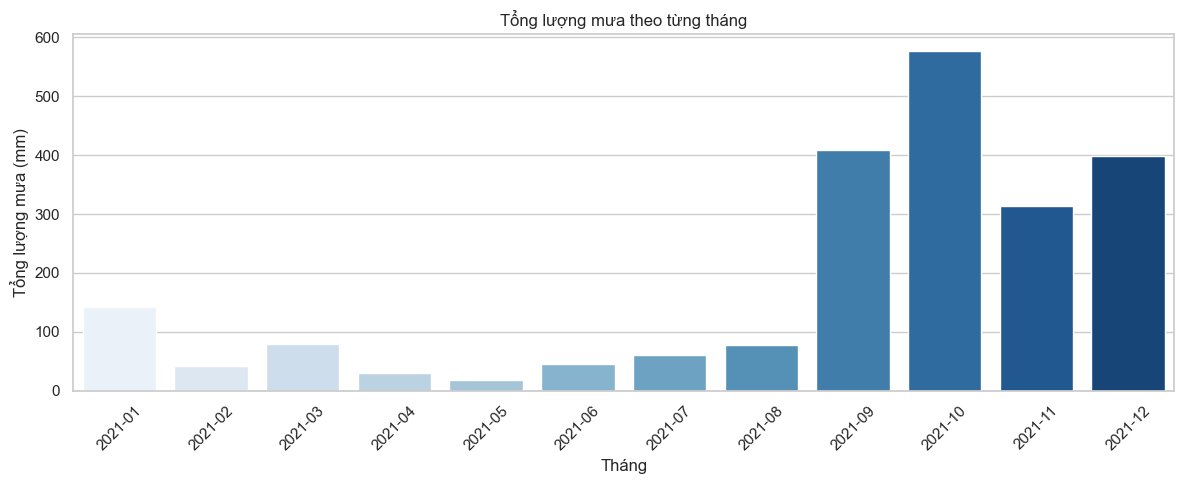

In [9]:
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_rain, x="year_month", y="rain", palette="Blues")
plt.title("Tổng lượng mưa theo từng tháng")
plt.xlabel("Tháng")
plt.ylabel("Tổng lượng mưa (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
rain_hours = df[df["rain"] > 0]
rain_by_month = rain_hours.groupby("month").size().reset_index(name="rainy_hours")

C:\Users\minhp\AppData\Local\Temp\ipykernel_24364\3471104325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rain_by_month, x="month", y="rainy_hours", palette="Blues_d")


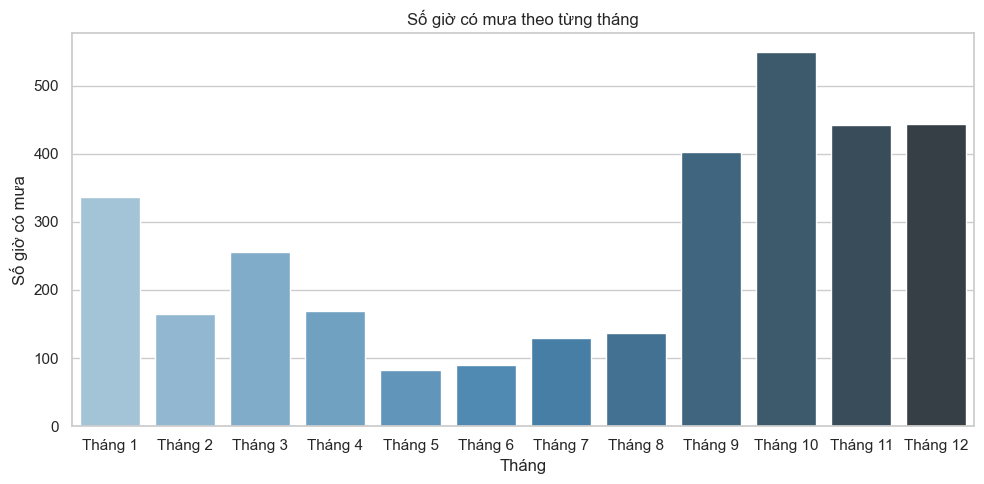

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(data=rain_by_month, x="month", y="rainy_hours", palette="Blues_d")
plt.title("Số giờ có mưa theo từng tháng")
plt.xlabel("Tháng")
plt.ylabel("Số giờ có mưa")
plt.xticks(range(0, 12), labels=["Tháng " + str(i) for i in range(1, 13)])
plt.tight_layout()
plt.show()

In [12]:
daily_max_rain = df.groupby(['year', 'month', 'day'])['rain'].max().reset_index(name='max_rain_per_day')
monthly_max_rain = daily_max_rain.groupby('month')['max_rain_per_day'].max().reset_index()

C:\Users\minhp\AppData\Local\Temp\ipykernel_24364\3883737728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_max_rain, x='month', y='max_rain_per_day', palette="Reds")


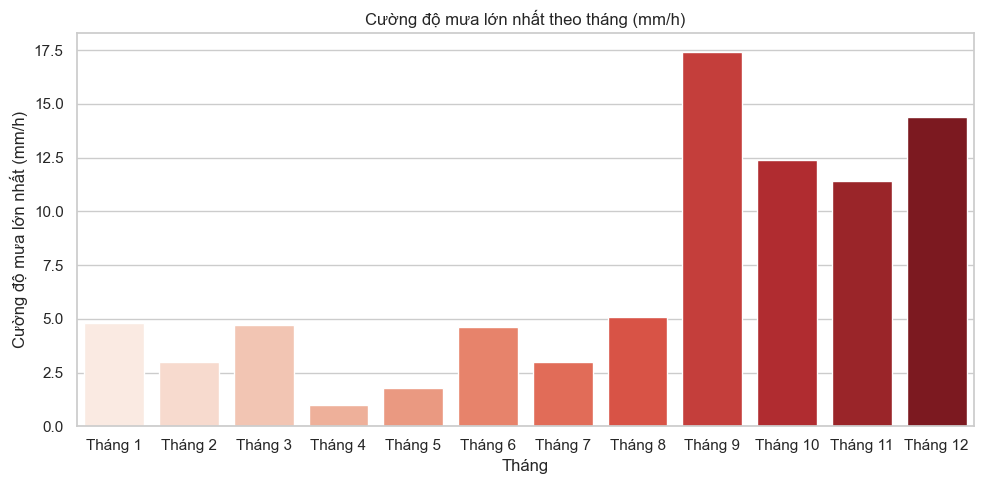

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_max_rain, x='month', y='max_rain_per_day', palette="Reds")
plt.title('Cường độ mưa lớn nhất theo tháng (mm/h)')
plt.xlabel('Tháng')
plt.ylabel('Cường độ mưa lớn nhất (mm/h)')
plt.xticks(range(0, 12), labels=["Tháng " + str(i) for i in range(1, 13)])
plt.tight_layout()
plt.show()

In [14]:
daily_max_rain = df.groupby(['year', 'month', 'day'])['rain'].max().reset_index(name='max_rain_per_day')
def top5_mean(x):
    return x.sort_values(ascending=False).head(5).mean()

C:\Users\minhp\AppData\Local\Temp\ipykernel_24364\1788232402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_top5_avg, x='month', y='top5_avg_rain', palette="OrRd")


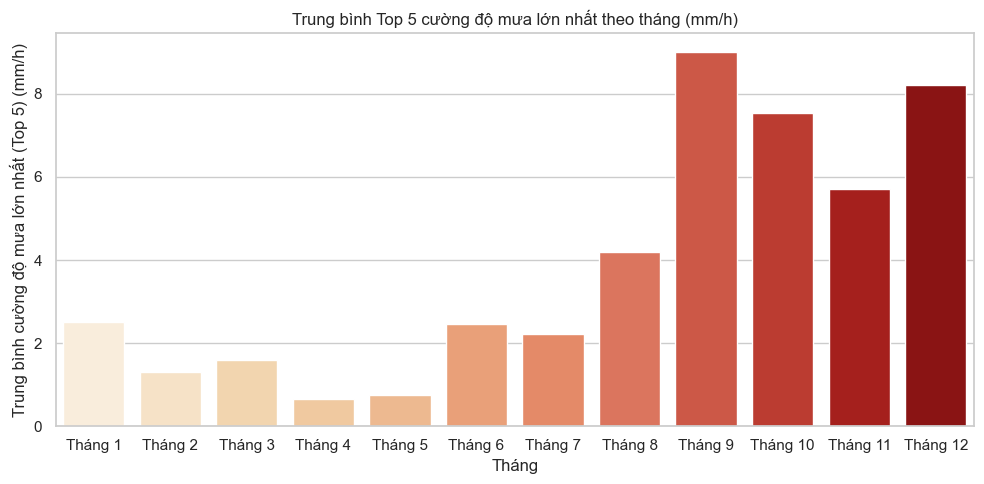

In [15]:
monthly_top5_avg = daily_max_rain.groupby('month')['max_rain_per_day'].apply(top5_mean).reset_index(name='top5_avg_rain')


plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_top5_avg, x='month', y='top5_avg_rain', palette="OrRd")
plt.title('Trung bình Top 5 cường độ mưa lớn nhất theo tháng (mm/h)')
plt.xlabel('Tháng')
plt.ylabel('Trung bình cường độ mưa lớn nhất (Top 5) (mm/h)')
plt.xticks(ticks=range(0, 12), labels=["Tháng " + str(i) for i in range(1, 13)])
plt.tight_layout()
plt.show()

In [16]:
pivot_table = df.groupby(['month', 'hour'])['rain'].mean().reset_index()
pivot = pivot_table.pivot(index='hour', columns='month', values='rain')

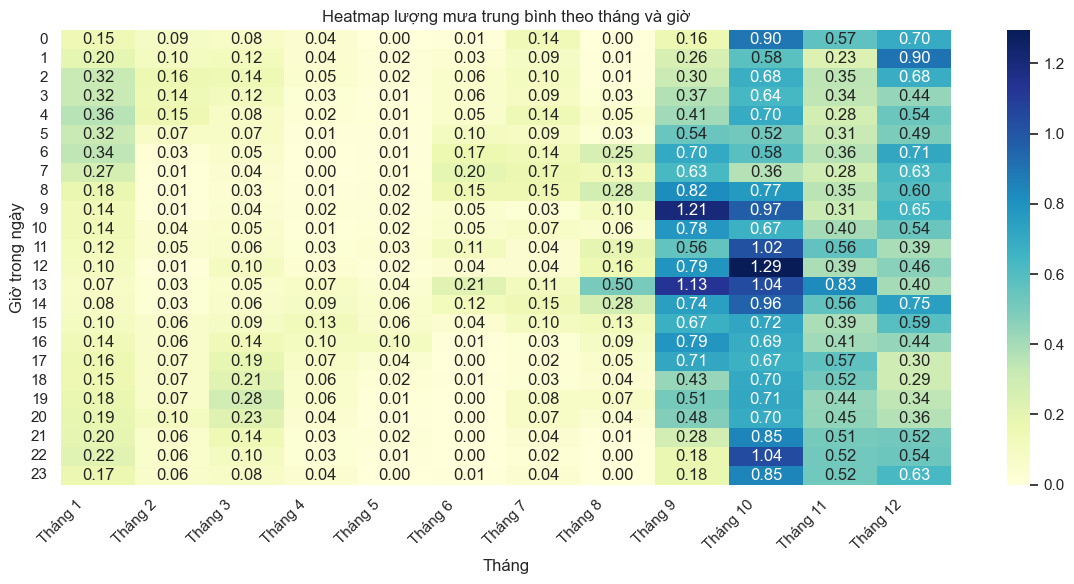

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2f")

plt.title('Heatmap lượng mưa trung bình theo tháng và giờ')
plt.xlabel('Tháng')
plt.ylabel('Giờ trong ngày')
plt.xticks(ticks=range(12), labels=["Tháng " + str(i) for i in range(1, 13)], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()